In [19]:
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub

m = hub.KerasLayer('https://www.kaggle.com/models/google/mobile-food-segmenter-v1/frameworks/TensorFlow1/variations/seefood-segmenter-mobile-food-segmenter-v1/versions/1', output_key="food_group_segmenter:semantic_predictions")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [20]:
m.get_config()

{'name': 'keras_layer_1',
 'trainable': False,
 'dtype': 'float32',
 'handle': 'https://www.kaggle.com/models/google/mobile-food-segmenter-v1/frameworks/TensorFlow1/variations/seefood-segmenter-mobile-food-segmenter-v1/versions/1',
 'signature': 'default',
 'output_key': 'food_group_segmenter:semantic_predictions'}

In [3]:
import numpy as np

train_imgs = np.load("backup.npy", allow_pickle=True).item()

In [81]:
imgs = [*iter(train_imgs.values())]

In [86]:
import matplotlib.colors as mcolors
import random
from matplotlib import pyplot as plt
from matplotlib import colors

l = [*mcolors.CSS4_COLORS.keys()]
random.shuffle(l)
cols = l[:26]

cmap = colors.ListedColormap(cols)

def plot_matrix(ax, rm, cmap=plt.cm.Blues):
    ax.imshow(rm, interpolation='nearest', cmap=cmap)

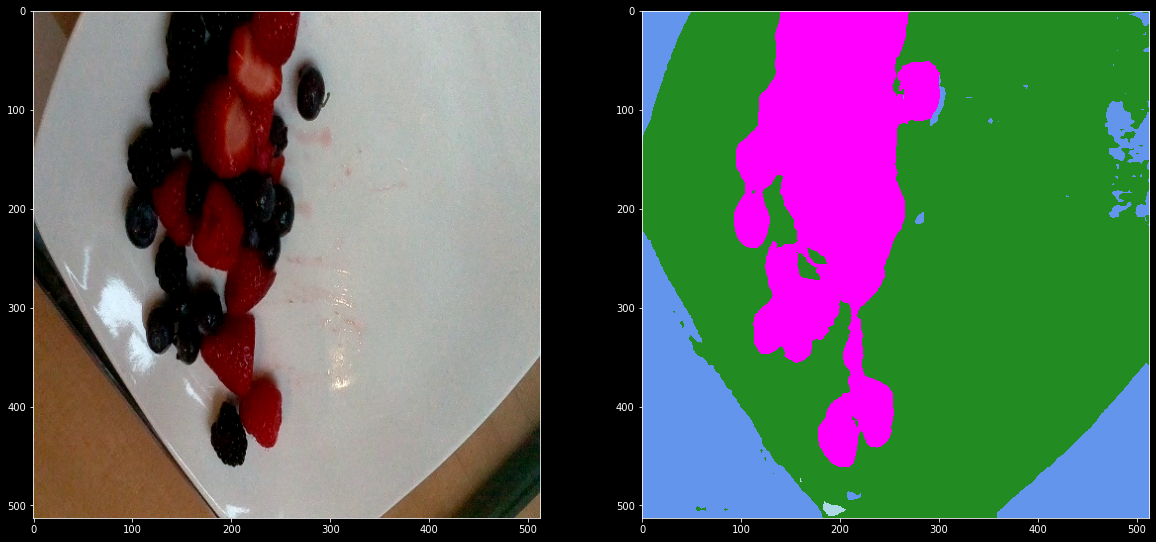

In [226]:
a = imgs[11]
a = a.astype(np.float32) / 255.0
a = a.reshape(1, 513, 513, 3)
r = m(a)

from matplotlib import pyplot as plt
import cv2

f, axarr = plt.subplots(1, 2, figsize=(20, 20)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(
    cv2.cvtColor((a[0] * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)
)
plot_matrix(axarr[1], r[0], cmap=cmap)

In [94]:
set(r.numpy().flatten())

{0, 5, 23, 24}

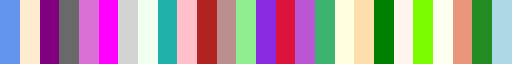

In [88]:
cmap

In [89]:
[*enumerate(cols)]

[(0, 'cornflowerblue'),
 (1, 'blanchedalmond'),
 (2, 'purple'),
 (3, 'dimgrey'),
 (4, 'orchid'),
 (5, 'fuchsia'),
 (6, 'lightgrey'),
 (7, 'honeydew'),
 (8, 'lightseagreen'),
 (9, 'pink'),
 (10, 'firebrick'),
 (11, 'rosybrown'),
 (12, 'lightgreen'),
 (13, 'blueviolet'),
 (14, 'crimson'),
 (15, 'mediumorchid'),
 (16, 'mediumseagreen'),
 (17, 'lightyellow'),
 (18, 'navajowhite'),
 (19, 'green'),
 (20, 'seashell'),
 (21, 'lawngreen'),
 (22, 'ivory'),
 (23, 'darksalmon'),
 (24, 'forestgreen'),
 (25, 'lightblue')]

## Prediction

In [133]:
# cal/g,fat(g),carb(g),protein(g)
data = {
    1: (200*1e3/8.2, 8/8.2, 24/8.2, 8/8.2),
    2: (53*1e3/4, 0, 13.1/4, 1.3/4),
    3: (53*1e3/4, 0, 13.1/4, 1.3/4),
    4: (76*1e3/4.8, 0, 16.5/4.8, 3/4.8),
    5: (273*1e3/6.4, 10/6.4, 26.92/6.4, 4/6.4),
    6: (579*1e3/8.7, 24.7/8.7, 0, 83.6/8.7),
    7: (125*1e3/8.3, 5.66/8.3, 0, 8.97/8.3),
    8: (180*1e3/3.5, 12/3.5, 0, 5/8.3),
    9: (132*1e3/8.7, 0, 0, 26.67/8.3),
    10: (209*1e3/6.2, 0.8/6.2, 37.33/6.2, 14.74/6.2),
    11: (460*1e3/4.2, 6.58/4.2, 82.19/4.2, 16.96/4.2),
    12: (166*1e3/5.8, 0.56/5.8, 35/5.8, 6.54/5.8),
    13: (131*1e3/9.1, 3.8/9.1, 20.71/9.1, 3.62/9.1),
    14: (263*1e3/6.9, 0.37/6.9, 64.62/6.9, 2.07/6.9),
    15: (600*1e3/5.6, 12/5.6, 108/5.6, 24/5.6),
    16: (139*1e3/8.7, 4.24/8.7, 16.07/8.7, 9.57/8.7),
    17: (282*1e3/3.5, 14.28/3.5, 49.7/3.5, 13.46/3.5),
    18: (163*1e3/8, 2.26/8, 6.1/8, 28.02/8),
    19: (707*1e3/5.1, 46.57/5.1, 65.55/5.1, 20.73/5.1),
    20: (363*1e3/3.5, 3.3/3.5, 91.5/3.5, 2.4/3.5),
    21: (837*1e3/13.5, 0.15/13.5, 335.54/13.5, 1.73/13.5),
    22: (79*1e3/8.5, 0, 16.01/8.5, 16.01/8.5)
}

In [97]:
train_imgs = np.load("backup2.npy", allow_pickle=True).item()

In [98]:
import torch

In [142]:
def get_nutrients(i):
    if i not in data:
        return (.0, .0, .0, .0)
    return data[i]

mapping = np.zeros((26, 4))
for i in range(26):
    mapping[i] = np.array(get_nutrients(i))

def map(i):
    if i not in data:
        return (.0, .0, .0, .0)
    return data[i]

mapv = np.vectorize(map)

In [123]:
np.arange(22, 25)

array([22, 23, 24])

In [149]:
print(np.array(mapv(np.arange(0, 26))).T)
np.sum(np.array(mapv(np.arange(0, 26))).T, axis=0)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.43902439e+04 9.75609756e-01 2.92682927e+00 9.75609756e-01]
 [1.32500000e+04 0.00000000e+00 3.27500000e+00 3.25000000e-01]
 [1.32500000e+04 0.00000000e+00 3.27500000e+00 3.25000000e-01]
 [1.58333333e+04 0.00000000e+00 3.43750000e+00 6.25000000e-01]
 [4.26562500e+04 1.56250000e+00 4.20625000e+00 6.25000000e-01]
 [6.65517241e+04 2.83908046e+00 0.00000000e+00 9.60919540e+00]
 [1.50602410e+04 6.81927711e-01 0.00000000e+00 1.08072289e+00]
 [5.14285714e+04 3.42857143e+00 0.00000000e+00 6.02409639e-01]
 [1.51724138e+04 0.00000000e+00 0.00000000e+00 3.21325301e+00]
 [3.37096774e+04 1.29032258e-01 6.02096774e+00 2.37741935e+00]
 [1.09523810e+05 1.56666667e+00 1.95690476e+01 4.03809524e+00]
 [2.86206897e+04 9.65517241e-02 6.03448276e+00 1.12758621e+00]
 [1.43956044e+04 4.17582418e-01 2.27582418e+00 3.97802198e-01]
 [3.81159420e+04 5.36231884e-02 9.36521739e+00 3.00000000e-01]
 [1.07142857e+05 2.14285714e+00 1.92857143e+01 4.285714

array([1.01966065e+06, 2.88291999e+01, 1.62215602e+02, 4.51181200e+01])

In [236]:
class Predictor(torch.nn.Module):
    # define model elements
    def __init__(self):
        super(Predictor, self).__init__()
        self.param = torch.nn.Parameter(torch.tensor([100.]))

    def get_nutrients(self, i, n):
        if i.item() not in data:
            return torch.tensor([.0, .0, .0, .0], requires_grad=True)
        return torch.tensor(data[i.item()]) * (n ** (1.5)) / self.param

    def forward(self, X):
        r = m(X)
        i, c = torch.unique(torch.tensor(r[0].numpy()), return_counts=True)
        aggr = torch.zeros((4,))
        for el, count in zip(i, c):
            # print(aggr, self.get_nutrients(el, count))
            aggr += self.get_nutrients(el, count)
        return aggr

In [237]:
p = Predictor()
p(a)

tensor([0., 0., 0., 0.], grad_fn=<AddBackward0>)

In [186]:
import requests

cafe1 = requests.get("https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe1.csv").text
cafe2 = requests.get("https://storage.googleapis.com/nutrition5k_dataset/nutrition5k_dataset/metadata/dish_metadata_cafe2.csv").text

cafe = cafe1 + '\n' + cafe2

parsed_data = {}
for line in cafe.split('\n'):
  data_values = line.strip().split(",")
  parsed_data[data_values[0]] = data_values

In [218]:
#cal/g,fat(g),carb(g),protein(g)
dish_data = {k: torch.tensor([float(v[2]), float(v[3]), float(v[4]), float(v[5])]) for k,v in parsed_data.items() if len(v) > 5}
print(dish_data)

{'dish_1561662216': tensor([193.0000,  12.3875,  28.2183,  18.6340]), 'dish_1562688426': tensor([88.0000,  8.2560,  5.1900, 10.2970]), 'dish_1561662054': tensor([292.0000,  23.8382,  26.3515,  25.9106]), 'dish_1562008979': tensor([290.0000,  22.2246,  10.1736,  35.3454]), 'dish_1560455030': tensor([103.0000,   0.1480,   4.6250,   0.9560]), 'dish_1558372433': tensor([143.0000,   0.2860,   0.4290,  20.0200]), 'dish_1563379132': tensor([119.0000,  14.2800,  14.2800,  10.5910]), 'dish_1565640549': tensor([139.0000,   1.5685,   7.0439,   2.6415]), 'dish_1563207364': tensor([271.0000,  13.7740,  30.6570,  15.0100]), 'dish_1561575474': tensor([183.0000,   4.9661,  17.4127,   2.9904]), 'dish_1550795690': tensor([131.0000,   0.2620,  18.3400,   0.3930]), 'dish_1563216717': tensor([332.0000,   5.6365,  16.2848,  33.0687]), 'dish_1565972591': tensor([122.0000,  12.2000,   3.6600,  17.0800]), 'dish_1568649312': tensor([78.0000,  0.2340, 10.9200,  0.5460]), 'dish_1550876012': tensor([207.0000,   4.

In [238]:
import random

for epoch in range(10):
    # enumerate mini batches
    last_loss = 0
    p.zero_grad()
    for dish in random.sample(dish_data.keys(), 10):
        if dish not in train_imgs:
            continue
        a = train_imgs[dish]
        a = a.astype(np.float32) / 255.0
        a = a.reshape(1, 513, 513, 3)
        output = p(a)
        # calculate loss
        target = torch.tensor(dish_data[dish])
        loss = torch.nn.functional.mse_loss(output, target)
        last_loss = loss.item()
        # credit assignment
        loss.backward()
        # update model weights
        p.param.data -= p.param.grad * 0.01
    
    print(f"Epoch {epoch} loss: {last_loss}")

C:\Users\mario\AppData\Local\Temp\ipykernel_15668\3323253833.py:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for dish in random.sample(dish_data.keys(), 10):
C:\Users\mario\AppData\Local\Temp\ipykernel_15668\3323253833.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(dish_data[dish])


Epoch 0 loss: 960.4392700195312
Epoch 1 loss: 34642.453125
Epoch 2 loss: 2523.405517578125
Epoch 3 loss: 148.47698974609375
Epoch 4 loss: 17658.53125
Epoch 5 loss: 45664.15234375
Epoch 6 loss: 23139.27734375
Epoch 7 loss: 110239.4765625
Epoch 8 loss: 1263.8203125
Epoch 9 loss: 537.4230346679688


In [248]:
losses = []

In [251]:
optimizer = torch.optim.Adam(p.parameters(), lr=0.01)

for epoch in range(100):
    # enumerate mini batches
    last_loss = 0
    for dish in random.sample(dish_data.keys(), 10):
        if dish not in train_imgs:
            continue
        a = train_imgs[dish]
        a = a.astype(np.float32) / 255.0
        a = a.reshape(1, 513, 513, 3)
        output = p(a)
        # calculate loss
        target = torch.tensor(dish_data[dish])
        loss = torch.nn.functional.mse_loss(output, target)
        last_loss = loss.item()
        losses.append(last_loss)
        optimizer.zero_grad()
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()
    print(f"Epoch {epoch} loss: {last_loss}")

C:\Users\mario\AppData\Local\Temp\ipykernel_15668\247458502.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for dish in random.sample(dish_data.keys(), 10):
C:\Users\mario\AppData\Local\Temp\ipykernel_15668\247458502.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(dish_data[dish])


Epoch 0 loss: 291.4576110839844
Epoch 1 loss: 5987.890625
Epoch 2 loss: 2986.18408203125
Epoch 3 loss: 13668.201171875
Epoch 4 loss: 28353.81640625
Epoch 5 loss: 9604.75
Epoch 6 loss: 443.0823974609375
Epoch 7 loss: 5670.58056640625
Epoch 8 loss: 15907.4072265625
Epoch 9 loss: 3568.082763671875
Epoch 10 loss: 1033.4871826171875
Epoch 11 loss: 23945.70703125
Epoch 12 loss: 24679.302734375
Epoch 13 loss: 25382.23046875
Epoch 14 loss: 874.5696411132812
Epoch 15 loss: 28174.552734375
Epoch 16 loss: 7356.13916015625
Epoch 17 loss: 29047.07421875
Epoch 18 loss: 1924.2783203125
Epoch 19 loss: 53785.64453125
Epoch 20 loss: 579.2517700195312
Epoch 21 loss: 2764.449462890625
Epoch 22 loss: 31371.39453125
Epoch 23 loss: 257.4452209472656
Epoch 24 loss: 409.2313232421875
Epoch 25 loss: 84.64585876464844
Epoch 26 loss: 366.58892822265625
Epoch 27 loss: 603.4384155273438
Epoch 28 loss: 27198.31640625
Epoch 29 loss: 8017.33642578125
Epoch 30 loss: 11198.4833984375


KeyboardInterrupt: 

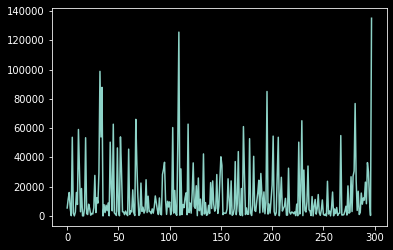

In [252]:
plt.plot(losses)